## Talib
Talib是python用于金融技术分析的包。


**TA_Lib提供什么样的函数？**

重叠研究（Overlap Studies）

动能指标（Momentum Indicators）

周期指标（Cycle Indicators）

成交量指标（Volume Indicators）

波动率指标（Volatility Indicators）

数学操作（Math Operators）

数学变换（Math Transform）

统计功能（Statistic Functions）

价格转换（Price Transform）

形态识别（Pattern Recognition）

### 1、 TA_Lib需要什么样的数据格式？

'numpy.ndarray'

dataframe

In [20]:
import talib as ta
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

data = pd.read_excel('sz50.xlsx', sheetname='600036.XSHG', index_col='datetime')

#读取'numpy.ndarray'
print(ta.MA(data.close.values, 5)[-5:])

[109.272 109.902 110.724 112.568 114.85 ]


In [23]:
# data

In [16]:
print(type(data.close))

<class 'pandas.core.series.Series'>


In [17]:
#直接读取DataFrame,默认读取cloumns名为close的数据。
print(ta.abstract.MA(data, 5).tail())

datetime
2017-11-14 15:00:00    118.426
2017-11-15 15:00:00    118.462
2017-11-16 15:00:00    118.162
2017-11-17 15:00:00    118.442
2017-11-20 15:00:00    118.536
dtype: float64


### 2、 Band
多个返回值

In [4]:
upperBand , middleBand, lowerBand = ta.BBANDS(data.close.values)

In [5]:
print(upperBand[-5:], '\n', middleBand[-5:],'\n', lowerBand[-5:])

[120.07386407 120.07328024 120.60352084 121.2296413  121.54995687] 
 [118.426 118.462 118.162 118.442 118.536] 
 [116.77813593 116.85071976 115.72047916 115.6543587  115.52204313]


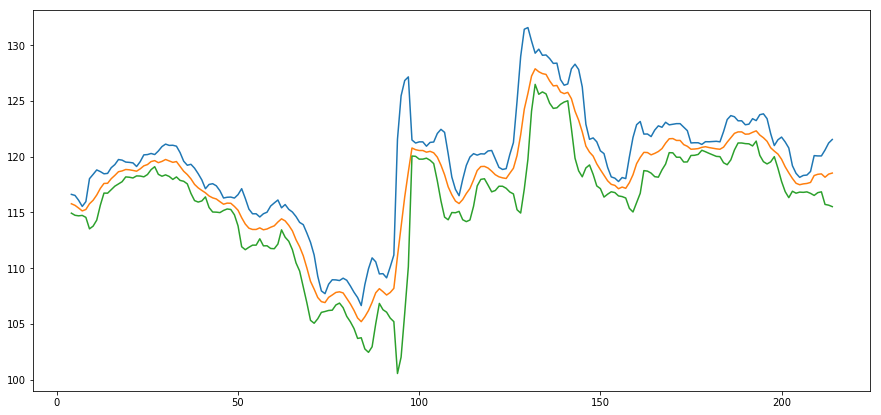

In [51]:
fig = plt.figure(figsize=(15, 7))
plt.plot(upperBand)
plt.plot(middleBand)
plt.plot(lowerBand)
plt.show()

### 3、 Momentum

In [27]:
stocks = pd.Panel({s: pd.read_excel('sz50.xlsx', sheetname=s, index_col='datetime') 
                   for s in ['600036.XSHG', '600050.XSHG', '600000.XSHG']})

In [32]:
ROCR100 = pd.DataFrame({item: ta.ROCR100(value.values) for item, value in stocks.minor_xs('close').iteritems()}, 
             index = stocks.minor_xs('close').index)

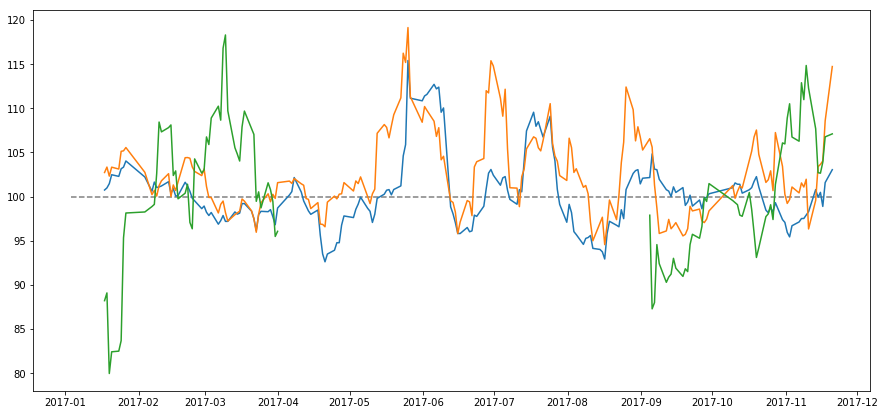

In [34]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 7))
plt.hlines(100,ROCR100.index[0],ROCR100.index[-1] , linestyles='dashed', alpha=0.5)
plt.plot(ROCR100)
plt.show()

### 4、 Volume

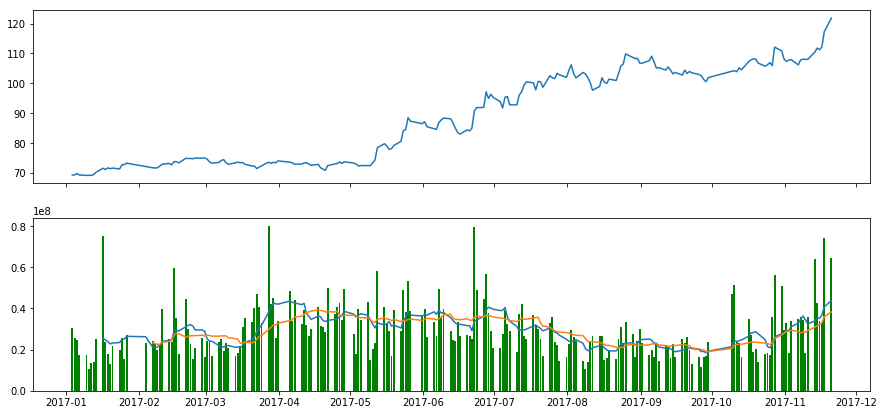

In [49]:
import numpy as np

volume = pd.Series(np.array(data.volume.values, dtype='float64'), index=data.index)
volumeSMA = pd.Series(ta.MA(volume.values,10), index=data.index)
volumeLMA = pd.Series(ta.MA(volume.values,20), index=data.index)

fig, (ax, ax1) = plt.subplots(2, 1, sharex=True, figsize=(15,7))
ax.plot(data.close)
ax1.bar(volume.index, volume.values,color='g')
ax1.plot(volumeSMA)
ax1.plot(volumeLMA)
plt.show()

### 5、 Regression

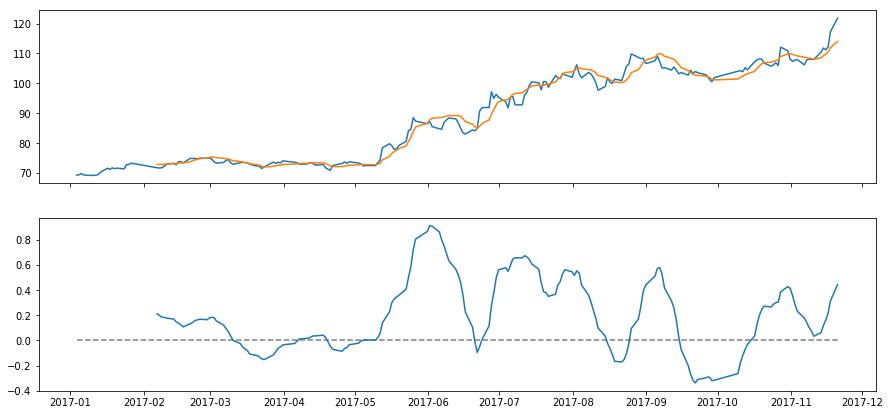

In [77]:
Reg = ta.abstract.LINEARREG(data, 20)
slope = ta.abstract.LINEARREG_SLOPE(data, 20)
fig, (ax, ax1) = plt.subplots(2, 1, sharex=True, figsize=(15,7))
ax.plot(data.close)
ax.plot(Reg)
ax1.plot(slope)
plt.hlines(0,slope.index[0],slope.index[-1] , linestyles='dashed', alpha=0.5)
plt.show()

### 6、 Volatility

In [79]:
ta.ATR?

In [86]:
atr = ta.ATR(data.high.values, data.low.values, data.close.values, 10)

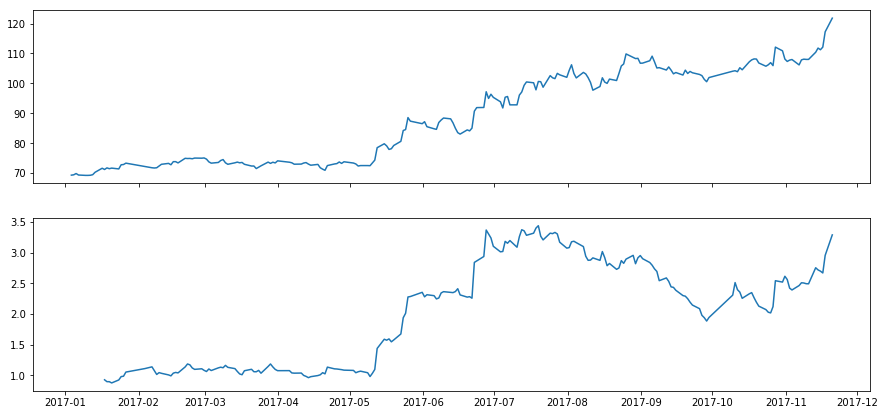

In [87]:
fig, (ax, ax1) = plt.subplots(2, 1, sharex=True, figsize=(15,7))
ax.plot(data.close)
ax1.plot(pd.Series(atr, index=data.index))
plt.show()